In [301]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2

In [296]:
def display(img1, mask=1):
    fig = plt.figure(figsize=[7,7])
    ax1=plt.subplot(121);ax1.imshow(img,cmap='gray');
    if mask == 1:
        ax2=plt.subplot(122);ax2.imshow(img1,cmap='rainbow');
    else:
        ax2=plt.subplot(122);ax2.imshow(img1,cmap='gray');

def remove_union(a, union_find):
    if a in union_find:
        if union_find[int(a)] != a:
            union_find[int(a)], union_find = remove_union(union_find[int(a)], union_find)
        return union_find[int(a)], union_find
    else:
        return a, union_find

def compute_mask(img_bin):
    (h, w) = img_bin.shape
    mask = np.zeros((h, w))
    
    components = 1
    union_find = {}
    
    
    for i in range(h):
        for j in range(w):
            if img_bin[i,j] == 1:
                if i == 0 and j == 0:
                    mask[i,j] = components
                elif i == 0:
                    mask[i,j] = mask[i,j-1]
                elif j == 0:
                    mask[i,j] = mask[i-1,j]
                elif mask[i,j-1] == 0 and mask[i-1,j] != 0:
                    mask[i,j] = mask[i-1,j]
                elif mask[i,j-1] != 0 and mask[i-1,j] == 0:
                    mask[i,j] = mask[i,j-1]
                elif mask[i-1,j] != mask[i,j-1]:
                    mask[i,j] = min(mask[i,j-1],mask[i-1,j])
                    
                    maxi = max(mask[i,j-1],mask[i-1,j])
                    mini = min(mask[i,j-1],mask[i-1,j])
                    union_find[maxi] = mini
                else:
                    components = components + 1
                    mask[i,j] = components
    return mask, union_find

def connected_components(img_bin):
    # 2 pass algorithm
    (h, w) = img_bin.shape
    mask, union_find = compute_mask(img_bin)
    for i in range(h):
        for j in range(w):
            if mask[i,j]:
                mask[i,j], union_find = remove_union(mask[i,j], union_find)
    return mask

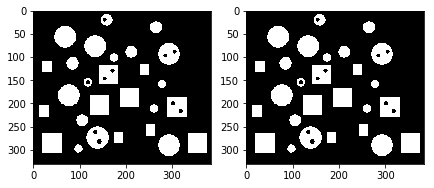

In [334]:
img = cv2.imread('../input/objects.png',0)
img = np.array(img)
# plt.imshow(img,cmap='gray');plt.show();
img = img/255
img = img.astype('uint8')
display(img,0)
# img_inv = 1 - img
# # img_inv
# display(img_inv,0)
# # plt.imshow(img1,cmap='gray');plt.show();
# # mask = connected_components(img)
# _,mask = cv2.connectedComponents(img*255)
# parent = np.arange(10000)
# # mask_inv = connected_components(img_inv)
# _,mask_inv = cv2.connectedComponents(img_inv.astype(np.uint8))

# # mask_inv[np.where(mask_inv==0)]=np.nan
# # mask[np.where(mask==0)]=np.nan

# display(np.array(mask))
# display(np.array(mask_inv))
# print(np.max(img))
# mask = mask.astype('float')
# plt.imshow(mask,cmap='rainbow');plt.show();
# plt.imshow(mask_inv,cmap='rainbow');plt.show();


In [394]:
# print(mask-mask_complete)

def func(img):
    img_inv = 1 - img
    # img_inv
#     display(img_inv,0)
    # plt.imshow(img1,cmap='gray');plt.show();
    # mask = connected_components(img)
    _,mask = cv2.connectedComponents(img*255)
#     parent = np.arange(10000)
    # mask_inv = connected_components(img_inv)
    _,mask_inv = cv2.connectedComponents(img_inv.astype(np.uint8))

    # mask_inv[np.where(mask_inv==0)]=np.nan
    # mask[np.where(mask==0)]=np.nan

#     display(np.array(mask))
#     display(np.array(mask_inv))
    
    # img_complete = np.zeros(img.shape)
    # img_complete[np.where(img==1)]=1
    img_complete = img.copy()
    img_complete[np.where(mask_inv!=mask_inv[0,0])]=1
#     display(img_complete,0)
    # img_complete = img.copy()
    # for i in range(img.shape[0]):
    #     for j in range(img.shape[1]):
    #         if int(mask_inv[i,j]) > 1:
    # #             print('yes\n')
    #             img_complete[i,j] = 255
    # mask_complete = connected_components(img_complete)
    # print(np.min(img_complete))
    X,mask_complete = cv2.connectedComponents(img_complete.astype(np.uint8))

    # print(len(np.unique(mask_complete)))
    display(mask_complete)
    # display(img_complete,0)
    # print(np.unique(mask_inv))
    cnt_img = np.zeros(100000)
    cnt_img_complete = np.zeros(100000)
    (h, w) = mask.shape
    for i in range(h):
        for j in range(w):
            if img[i,j] == 1:
                cnt_img[int(mask[i,j])] += 1
            if img_complete[i,j] == 1:
                cnt_img_complete[int(mask_complete[i,j])] += 1
    print(cnt_img_complete-cnt_img)

    answer = np.zeros((h, w))
    ans = 0
    for i in range(h):
        for j in range(w):
            if img[i,j] == 1 and cnt_img[int(mask[i,j])] < cnt_img_complete[int(mask_complete[i,j])]:
#                 ans += 1
                answer[i,j] = 1
    X,mask_ans = cv2.connectedComponents(answer.astype('uint8'))
    print("Number Of Components: "+str(len(np.unique(mask_ans))-1))
#     print(ans)
    display(answer,0)
    return answer

[ 0. 44.  0. ...  0.  0.  0.]
Number Of Components: 6


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

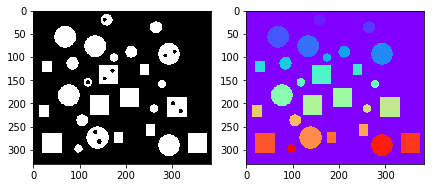

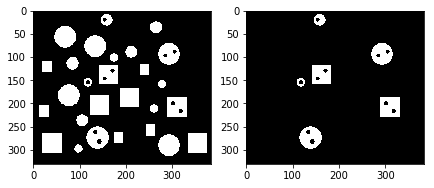

In [395]:
func(img)

In [396]:
def check(img, filt):
    output = np.zeros(img.shape)
    for i in range(1,img.shape[0]-1):
        for j in range(1,img.shape[1]-1):
            chk = 1
            for x in range(3):
                for y in range(3):
                    if filt[x][y] != img[i+x-1][j+y-1]:
                        chk = 0
            if chk == 1:
                output[i,j] = 1
    return output



[ 0.  9. 10. 11. 15. 16. 17. 19. 21. 23. 24. 25.]
(array([110, 115, 118, 167, 183, 187, 205, 245, 262, 265, 265]), array([ 19, 231, 142, 187, 122, 289,  14, 243, 174,  19, 334]))


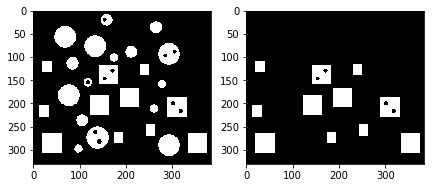

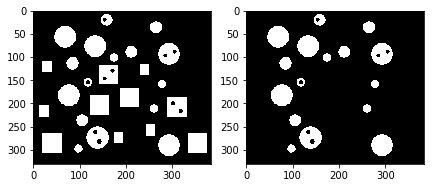

In [397]:
filt = [[0,0,0],[0,1,1],[0,1,1]]
img_filt = check(img,filt)

_,mask = cv2.connectedComponents(img)

temp = np.multiply(img_filt, mask)
check1 = np.zeros(10000)
output_squares = np.zeros(img.shape)

temp_unique = np.unique(temp)
# temp_unique = temp_unique
print(temp_unique)
for k in temp_unique:
    if k == 0:
        continue
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if k != 0 and mask[i,j] == k:
                output_squares[i,j] = 1
output_circles = img - output_squares
display(output_squares,0)
display(output_circles,0)
# display(img_filt,0)
print(np.where(img_filt!=0))

[0. 0. 0. ... 0. 0. 0.]
Number Of Components: 2
[ 0. 44.  0. ...  0.  0.  0.]
Number Of Components: 4


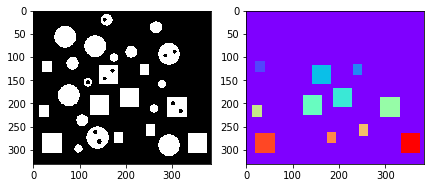

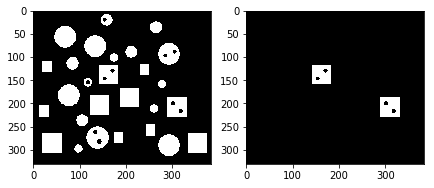

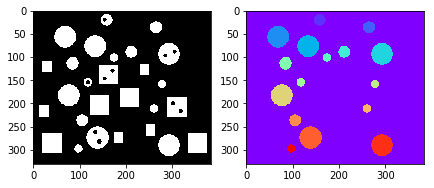

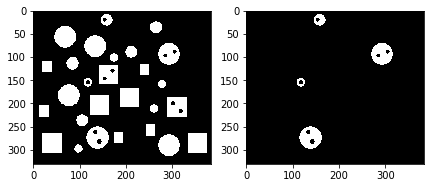

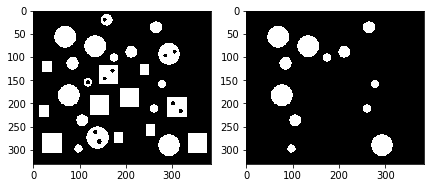

In [398]:
# np.max(output_squares)
func(output_squares.astype('uint8'))
output_hoes = func(output_circles.astype('uint8'))
output_nohoes = output_circles - output_hoes
display(output_nohoes,0)

In [399]:
# print(fi)